In [1]:
from algorithms.BoruvkasAlgorithm import BoruvkasAlgorithm
from algorithms.Graph import Graph
from algorithms.BoruvkasAlgorithmSingleMachine import BoruvkasAlgorithmSingleMachine
import matplotlib.pyplot as plt

In [2]:
G = Graph()
# G.add_vertex(1)
# G.add_vertex(2)
# G.add_vertex(3)
# G.add_vertex(4)
# G.add_vertex(5)
# G.add_vertex(6)
# G.add_vertex(7)
# G.add_vertex(8)
# G.add_vertex(9)
# G.add_vertex(10)
# G.add_edge(1, 7, 8)
# G.add_edge(1, 2, 2)
# G.add_edge(2, 3, 1)
# G.add_edge(2, 6, 8)
# G.add_edge(3, 7, 7)
# G.add_edge(3, 4, 6)
# G.add_edge(3, 6, 7)
# G.add_edge(4, 5, 1)
# G.add_edge(4, 7, 8)
# G.add_edge(4, 10, 5)
# G.add_edge(5, 6, 8)
# G.add_edge(7, 9, 4)
# G.add_edge(8, 7, 3)
# G.add_edge(8, 9, 3)
# G.add_edge(8, 10, 2)
# G.add_edge(10, 9, 4)

G.add_vertex(1)
G.add_vertex(2)
G.add_vertex(3)
G.add_vertex(4)
G.add_vertex(5)
G.add_vertex(6)
G.add_vertex(7)
G.add_vertex(8)
G.add_vertex(9)
G.add_vertex(10)
G.add_edge(1, 2, 3)
G.add_edge(2, 3, 2)
G.add_edge(3, 4, 1)
G.add_edge(4, 5, 2)
G.add_edge(5, 7, 3)
G.add_edge(7, 8, 5)
G.add_edge(8, 6, 3)
G.add_edge(6, 9, 2)
G.add_edge(9, 10, 1)
G.add_edge(10, 1, 2)
max_iterations = 10
alg = BoruvkasAlgorithm(G, max_iterations)
alg.run()

running boruvkas algorithm: max_iterations = 10
Graph:
	vertices:['(1, {2, 10}) ', '(2, {1, 3}) ', '(3, {2, 4}) ', '(4, {3, 5}) ', '(5, {4, 7}) ', '(6, {8, 9}) ', '(7, {8, 5}) ', '(8, {6, 7}) ', '(9, {10, 6}) ', '(10, {9, 1}) ']
	edges:['((2, 1), 3) ', '((3, 2), 2) ', '((4, 3), 1) ', '((5, 4), 2) ', '((7, 5), 3) ', '((8, 7), 5) ', '((8, 6), 3) ', '((9, 6), 2) ', '((10, 9), 1) ', '((10, 1), 2) ']
round 1
neighborhoods: ['(9, {1, 6, 8, 9, 10}) ', '(3, {2, 3, 4, 5, 7}) ']
	vertices:['(3, {9}) ', '(9, {3}) ']
	edges:['((9, 3), 3) ']
round 2
final neighborhood: (3, {9, 3})
	vertices:['(3, {}) ']
	edges:[]


({1: {1: 10, 2: 3, 3: 4, 4: 3, 5: 4, 6: 9, 7: 5, 8: 6, 9: 10, 10: 9},
  2: {3: 9, 9: 3}},
 {0: {1: set(),
   2: set(),
   3: {9},
   4: set(),
   5: set(),
   6: set(),
   7: set(),
   8: set(),
   9: {3},
   10: set()},
  1: {3: {9}, 9: {3}},
  2: {3: {}}},
 {0: {(9, 3): 3}, 1: {(9, 3): 3}, 2: {}})

In [3]:
points1a = [(3, 1), (4, 2),
            (5, 3), (6, 3), (7, 3),
            (5, 4), (6, 4), (7, 4), (4, 4), (3, 4), (2, 4),
            (5, 5), (6, 5), (7, 5),
            (3, 7), (4, 6),

            (1,13), (1,14), (2,13), (2,14), (3,13), (3,14), (4,13), (4,14), (5,13), (5,14), (6,13), (6,14),
            (5,15), (6,15), (5,12), (6,12),(5,11), (6,11), (5,11),

            (10,10), (10,11), (11,9),(12,9),(13,9),(14,9),(15,10),(15,11),(11,12),(12,12),(13,12),(14,12)]

points1b = [(1, 13), (1, 14), (2, 13), (2, 14), (3, 13), (3, 14), (4, 13), (4, 14),
          (3, 4), (4, 4), (5, 4),
           (5, 6), (6, 6), (7, 6),
            (8, 8), (9, 8), (10, 8),
             (10, 10), (11, 10), (12, 10),
              (13, 1), (14, 1), (15, 2), (15, 3), (13, 4), (14, 4)]


points1c = [(1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (1, 7),
            (2, 15), (2, 14), (2, 13), (2, 12), (2, 11), (2, 10), (2, 9), (2, 8), (2, 7),
            (3, 7), (4, 7), (5, 7), (6, 7),

            (7, 15), (9, 15), (11, 15), (13, 15), (15, 15),
            (7, 13), (9, 13), (11, 13), (13, 13), (15, 13),

            (8, 1), (10, 1),
            (9, 2), (11, 2),
            (8, 3), (10, 3), (12, 3),
            (9, 4), (11, 4), (13, 4),
            (10, 5), (12, 5), (14, 5),
            (11, 6), (13, 6), (15, 6),
            (12, 7), (14, 7),
            (13, 8), (15, 8)]

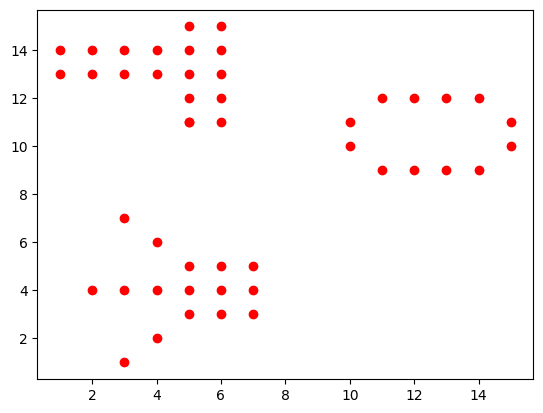

In [4]:
import math

def generate_graph(points):
    G = Graph()
    G.points = points

    # add a vertex for each point (map vertex id to xy data from points list)
    for i in range(len(points)):
        G.add_vertex(i)

    # add an edge for each possible point
    for i in G.V:
        for j in G.V:
            if i == j:
                continue

            (x1, y1) = G.points[i]
            (x2, y2) = G.points[j]

            w = math.ceil(math.sqrt((x1 - x2)**2 + (y1 - y2)**2))
            G.add_edge(i, j, w)

    return G

def generate_plot_for_graph(G):

    plt.figure()

    xs, ys = [], []
    for x in G.V.keys():
        xs.append(G.points[x][0])
        ys.append(G.points[x][1])

    plt.scatter(xs, ys, c='r')


G1a = generate_graph(points1a)

generate_plot_for_graph(G1a)

In [5]:
max_iterations = 10
alg = BoruvkasAlgorithm(G1a, max_iterations)
L, Vs, Es = alg.run()

running boruvkas algorithm: max_iterations = 10
Graph:
	vertices:['(0, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}) ', '(1, {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}) ', '(2, {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}) ', '(3, {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}) ', '(4, {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}) ', '(5, {0, 

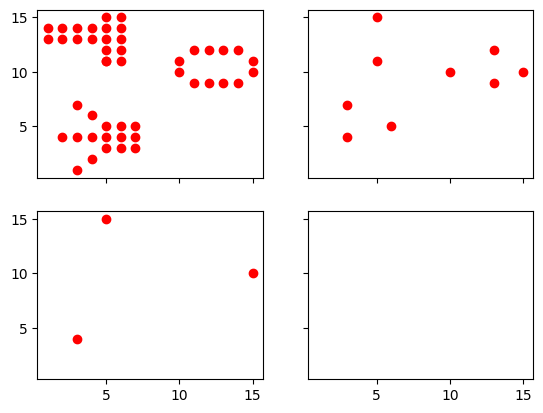

In [6]:
def plot_graph(V, E, points, ax):
    xs, ys = [], []
    for x in V.keys():
        xs.append(points[x][0])
        ys.append(points[x][1])

    # print(xs, ys)
    ax.scatter(xs, ys, c='r')

n = len(Vs)
fig, axarr = plt.subplots(2, 2, sharex='all', sharey='all')
for ax, i in zip(axarr.ravel(), range(len(axarr) + 1)):
    V = Vs[i]
    E = Es[i]
    plot_graph(V, E, points1a, ax)


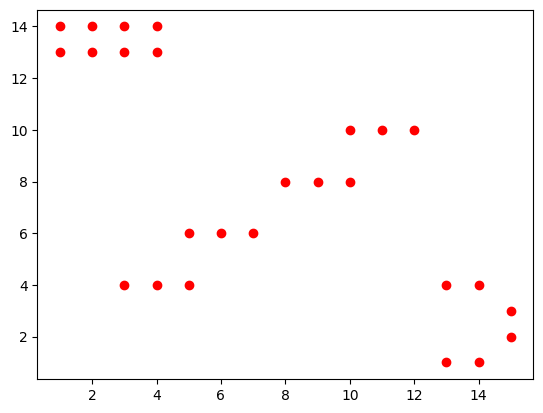

In [7]:
G1b = generate_graph(points1b)

generate_plot_for_graph(G1b)

In [8]:
max_iterations = 10
alg = BoruvkasAlgorithm(G1b, max_iterations)
L, Vs, Es = alg.run()

running boruvkas algorithm: max_iterations = 10
Graph:
	vertices:['(0, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(1, {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(2, {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(3, {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(4, {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(5, {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(6, {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(7, {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(8, {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}) ', '(9, {0, 1, 2, 3, 4, 5, 6

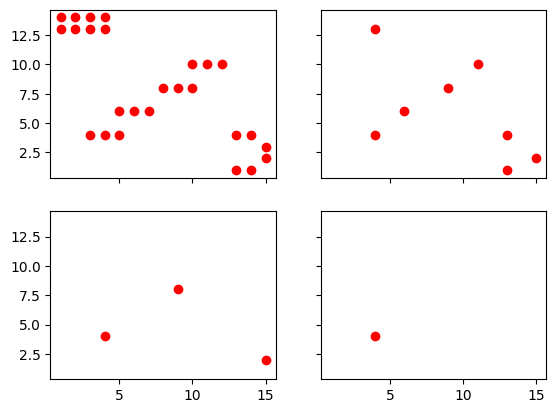

In [9]:
n = len(Vs)
fig, axarr = plt.subplots(2, 2, sharex='all', sharey='all')
for ax, i in zip(axarr.ravel(), range(len(axarr) + 2)):
    V = Vs[i]
    E = Es[i]
    plot_graph(V, E, points1b, ax)

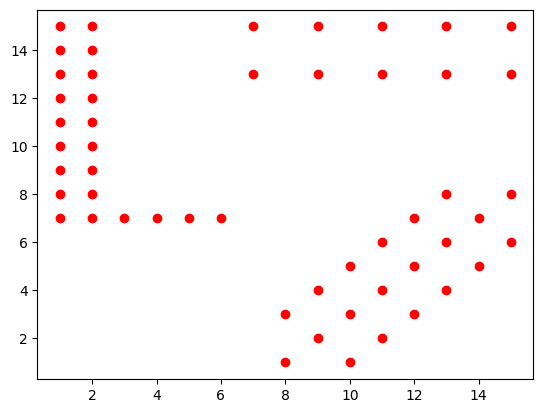

In [10]:
G1c = generate_graph(points1c)

generate_plot_for_graph(G1c)

In [11]:
max_iterations = 10
alg = BoruvkasAlgorithm(G1c, max_iterations)
L, Vs, Es = alg.run()

running boruvkas algorithm: max_iterations = 10
Graph:
	vertices:['(0, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}) ', '(1, {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}) ', '(2, {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}) ', '(3, {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}) ', '(4, {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3

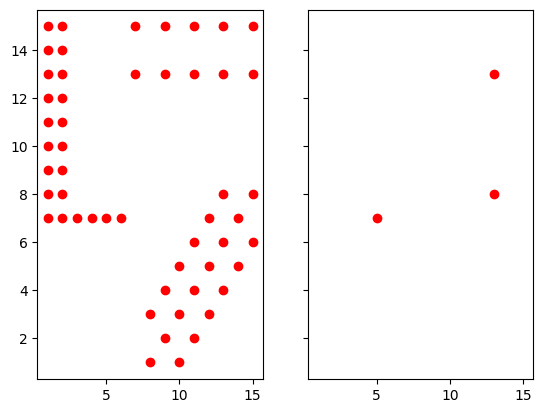

In [12]:
n = len(Vs)
fig, axarr = plt.subplots(1, 2, sharex='all', sharey='all')
for ax, i in zip(axarr.ravel(), range(len(axarr) + 1)):
    V = Vs[i]
    E = Es[i]
    plot_graph(V, E, points1c, ax)


# fig.tight_layout()